## Day 33 Lecture 2 Assignment

In this assignment, we will learn about non linear SVM models. We will use the heart disease dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report as report
from sklearn.metrics import confusion_matrix

import time


In [2]:
heart = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/framingham_heart_disease.csv')

In [3]:
heart.shape

(4238, 16)

In [4]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


This dataset helps us predict the probability of coronary heart diease (CHD) in the next 10 years given the risk factors for each subject in the study. Our target variable is `TenYearCHD`.

We'll start off by removing any rows containing missing data.

In [5]:
# answer below:
heart.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df = heart.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


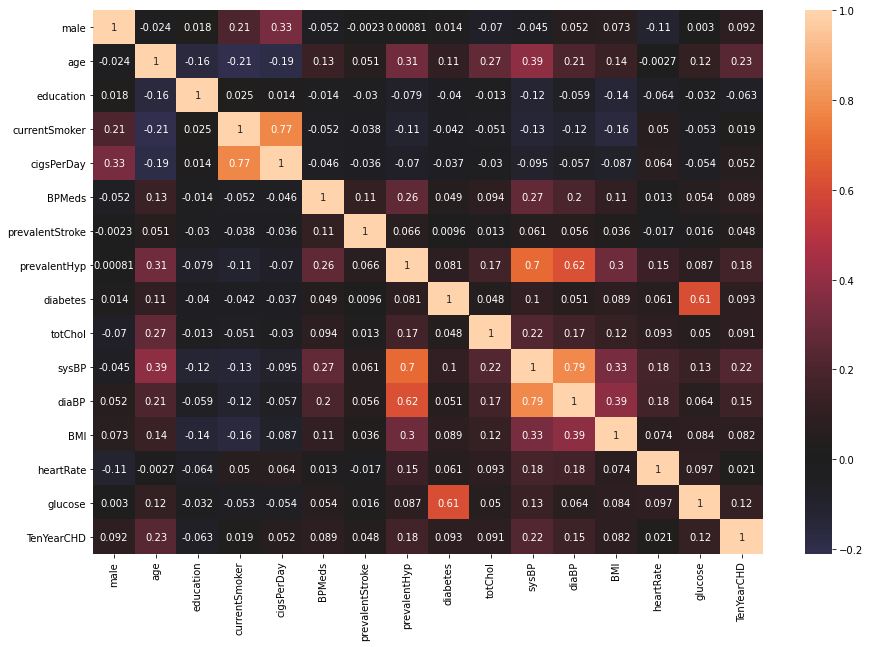

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, center=0)
plt.show()


In [9]:
# because of the high colinearity of some of the features, I decided to drop the 
# 'currentSmoker', 'sysBP' and 'diaBP' 

Then, we split the data into train and test with 20% of the data in the test subset.

In [10]:
# answer below:
x = df.drop(columns=['TenYearCHD', 'education', 'sysBP', 'diaBP', 'currentSmoker', 'glucose'])
y = df['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

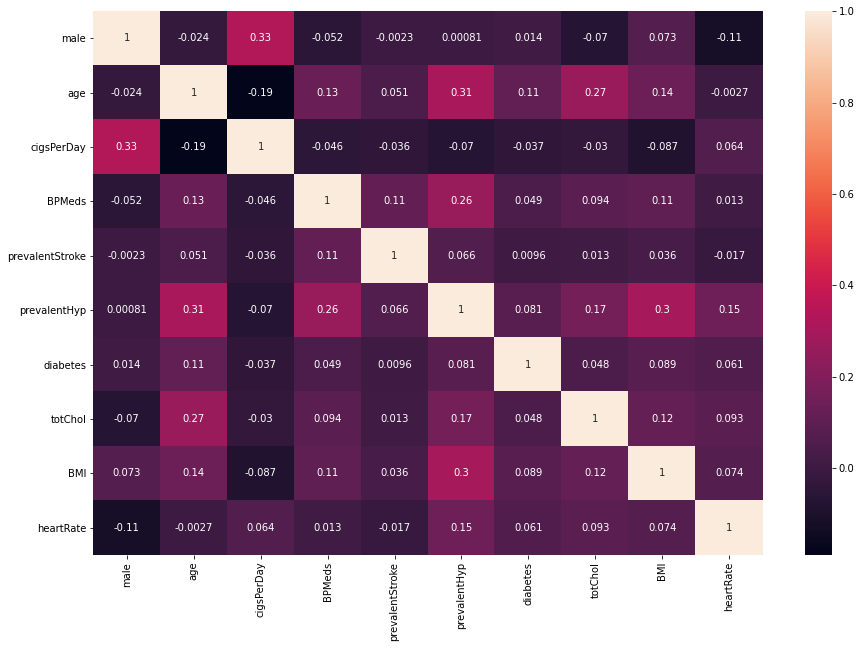

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(x.corr(), annot=True)

We will then scale the data using the standard scaler. Do this in the cell below.

In [12]:
# answer below:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [13]:
x_train.describe()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate
count,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000
mean,0.450068,49.481190,9.115253,0.029070,0.005472,0.305062,0.027018,236.907319,25.733464,75.777360
std,0.497586,8.574241,11.954529,0.168031,0.073783,0.460512,0.162163,44.258106,4.021442,12.052401
min,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,15.540000,45.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,23.060000,68.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,25.345000,75.000000
75%,1.000000,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,27.945000,82.000000
max,1.000000,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,56.800000,143.000000


Generate a polynomial SVC model and a RBF SVC model. Compare the performance, and the runtime, for the two models.

In [20]:
# answer below:
start_time = time.time()

# SVC polynomial with C=1 (default)
svc_poly = SVC(kernel='poly', degree=3, gamma='auto').fit(x_train_scaled, y_train)

print('SVC polynomial train score:', svc_poly.score(x_train_scaled, y_train))
print('SVC polynomial test score:', svc_poly.score(x_test_scaled, y_test))

print(f'Polynomial Runtime: {time.time() - start_time}')


SVC polynomial train score: 0.859781121751026
SVC polynomial test score: 0.8483606557377049
Polynomial Runtime: 1.2527134418487549


In [22]:
start_time = time.time()

# SVC RBF with C=1 (default)
svc_rbf = SVC(kernel='rbf', gamma='auto').fit(x_train_scaled, y_train)


print('SVC RBF train score:', svc_rbf.score(x_train_scaled, y_train))
print('SVC RBF test score:', svc_rbf.score(x_test_scaled, y_test))

print(f'RBF Runtime: {time.time() - start_time}')

SVC RBF train score: 0.853967168262654
SVC RBF test score: 0.8469945355191257
RBF Runtime: 0.463897705078125


In [23]:
test_pred_poly = svc_poly.predict(x_test_scaled)

test_pred_rbf = svc_rbf.predict(x_test_scaled)

In [24]:
print(f'Test Polynomial report:\n{report(y_test, test_pred_poly)}')
print(f'Test Polynomial confusion matrix:\n{confusion_matrix(y_test, test_pred_poly)}\n\n\n\n')

print(f'Test RBF report:\n{report(y_test, test_pred_rbf)}')
print(f'Test RBF confusion matrix:\n{confusion_matrix(y_test, test_pred_rbf)}')


Test Polynomial report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       621
           1       0.50      0.07      0.13       111

    accuracy                           0.85       732
   macro avg       0.68      0.53      0.52       732
weighted avg       0.80      0.85      0.80       732

Test Polynomial confusion matrix:
[[613   8]
 [103   8]]




Test RBF report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       621
           1       0.40      0.02      0.03       111

    accuracy                           0.85       732
   macro avg       0.63      0.51      0.48       732
weighted avg       0.78      0.85      0.78       732

Test RBF confusion matrix:
[[618   3]
 [109   2]]


In [26]:
print(f'Train Polynomial report:\n{report(y_train, svc_poly.predict(x_train_scaled))}')
print(f'Train Polynomial confusion matrix:\n{confusion_matrix(y_train, svc_poly.predict(x_train_scaled))}\n\n\n\n')

print(f'Train RBF report:\n{report(y_train, svc_rbf.predict(x_train_scaled))}')
print(f'Train RBF confusion matrix:\n{confusion_matrix(y_train, svc_rbf.predict(x_train_scaled))}')

Train Polynomial report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2478
           1       0.91      0.09      0.16       446

    accuracy                           0.86      2924
   macro avg       0.88      0.54      0.54      2924
weighted avg       0.87      0.86      0.81      2924

Train Polynomial confusion matrix:
[[2474    4]
 [ 406   40]]




Train RBF report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2478
           1       1.00      0.04      0.08       446

    accuracy                           0.85      2924
   macro avg       0.93      0.52      0.50      2924
weighted avg       0.88      0.85      0.79      2924

Train RBF confusion matrix:
[[2478    0]
 [ 427   19]]


Which model overfits more? How would you improve the overfitting?

Look at a classification report and confusion matrix. How does the class balance affect your results?

In [18]:
# answer below:

The polynomial model overfits consistently more than the RBF model. To improve overfitting, I could probably try different C or gamma values. There are a lot fewer positive observations than negative observations which could be contributing to the imbalace of the model. Another possibility to improve the recall of the positive would be to collect more data.
